# **1. Introduction**

## **Background Context**
**Planet Fitness** (PF) is an American operator of fitness centers founded in 1992. Withe 2,039 clubs around, PF is one of the largest fitness club franchises by number of members and locations.

It has approximately **13.5 million** members by January 2020, attained a **20%** market share of the US gym membership base.

Moreover, its total revenue in 2020 was **\$2.8 billion**, of which $2.4 billion was contributed by franchisee-owned stores.

## **Business Problem**
Customer memberships are integral part of Planet Fitness business. As the company continues to grow, it is important to also investigate customer attrition, **in particular due to non-payment of dues**. Few months ago, Planet Fitness was planning on giving out long-term membership offers to selective customers. This posesseses huge risk and the company would like to identify customers who fail to make payment ahead of time.

The objective of this project is to look at historical data of customers and determine whether they defaulted or continue making payment. Also, it is trying to come up with a machine learning solution that can be used to predict future defaulting.

## **Dataset**
This dataset contains customer information including age, gender, usage, months due, down payment, etc from **1997** to **1999**.

## **Content**
There are 9 variables:
* **enroldt**: Enrollment date of the membership
* **price**: membership price
* **downpmt**: Down payment
* **monthdue**: Months Due
* **pmttype**: Payment method type (1=Credit Card, 3=Cash, 4=Check, 5=Debit Card, 2 is missing in the original dataset)
* **use**: Usage
* **age**: Age of customer
* **gener**: Gender of customer (1=Male, 2=Female)
* **default**: (1=Default, 2=Non-Default)

# **2. Load Packages & Data**

**Importing basic libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

**Read data**

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/PlanetFitness.xlsx'
df = pd.read_excel(path)
print("Customer Default data - rows: %d, columns: %d" % (df.shape[0], df.shape[1]))

Customer Default data - rows: 24843, columns: 9


**Set constant**

In [ ]:
TEST_SIZE = 0.4 # simple validation using train_test_split
RANDOM_STATE = 42

# 3. Check Data

Peaking the data frame (first 5 rows).

In [ ]:
df.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,19970101,2178.85,250.00,6.0,4,1,0,2,0
1,19970102,1543.65,1543.65,6.0,1,0,0,2,0
2,19970103,1107.67,125.00,5.0,1,0,0,2,0
3,19970104,950.44,237.61,9.0,5,0,0,1,0
4,19970105,1436.00,250.00,9.0,3,0,0,2,0


Looking at the data frame info.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   enrolldt  24843 non-null  int64  
 1   price     24843 non-null  float64
 2   downpmt   24843 non-null  float64
 3   monthdue  24843 non-null  float64
 4   pmttype   24843 non-null  int64  
 5   use       24843 non-null  int64  
 6   age       24843 non-null  int64  
 7   gender    24843 non-null  int64  
 8   default   24843 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.7 MB


Looking into more details to the data - basic descriptive statistics (mean, median, min, max, standard deviation, etc) for each field.

In [ ]:
df.describe()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
count,2.484300e+04,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000
mean,1.998252e+07,1003.658899,199.824535,8.287290,3.093225,1.944371,29.203317,1.498007,0.115042
std,7.171701e+03,439.224768,335.437237,7.108381,1.560034,2.315550,13.277721,0.500006,0.319080
min,1.997010e+07,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.997631e+07,699.000000,49.000000,5.500000,1.000000,0.000000,22.000000,1.000000,0.000000
50%,1.998252e+07,999.000000,100.000000,6.000000,3.000000,1.000000,28.000000,1.000000,0.000000
75%,1.998873e+07,1249.000000,175.000000,9.000000,4.000000,3.000000,36.000000,2.000000,0.000000
max,1.999494e+07,9371.250000,9371.250000,120.000000,5.000000,8.000000,99.000000,2.000000,1.000000


There are 24,843 distinct customers. 

The average value for the price of membership is 1003.65. The standard deviation is unusually large, max value being 9371.25.

The std for downpmt is also unusually high. The mean is about 200 and std about 335. This is is due to extreme values such as the maximum value is 9371.25.

There are also outliers in monthdue causing the mean being 8.28 while the std is 7.1.

Average age is around 29 years old and approximately half of the customers are male and half are female.

In the default column, 1 means the customer defaults and 0 means the customer will not default. The default rate is approximately 11.5%.




Checking missing data.


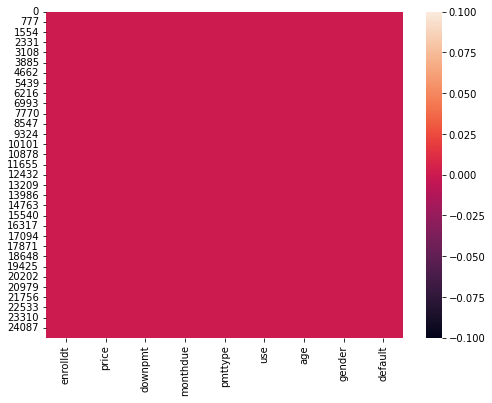

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull())

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
default,0,0.0
gender,0,0.0
age,0,0.0
use,0,0.0
pmttype,0,0.0
monthdue,0,0.0
downpmt,0,0.0
price,0,0.0
enrolldt,0,0.0


There is no missing data in the dataset.

# 4. Data Cleaning

1. Change the enrollment date to year.

2. Replace extremely high and low values with median for price, downpmt and month_due.

3. Replace unrealistically low and high values in the age column with median.


In [ ]:
# convert the enrollment date to year format
df['enrolldt'] = df.enrolldt.astype(str).str[:4]
df['enrolldt'] = pd.DatetimeIndex(pd.to_datetime(df['enrolldt'])).year
df.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,1997,2178.85,250.00,6.0,4,1,0,2,0
1,1997,1543.65,1543.65,6.0,1,0,0,2,0
2,1997,1107.67,125.00,5.0,1,0,0,2,0
3,1997,950.44,237.61,9.0,5,0,0,1,0
4,1997,1436.00,250.00,9.0,3,0,0,2,0


Text(0, 0.5, 'count')

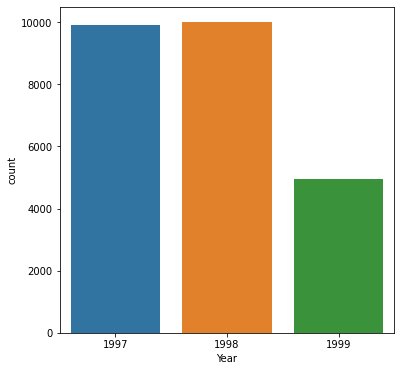

In [ ]:
# check the distribution of the year
plt.figure(figsize = (6, 6))
sns.countplot(df['enrolldt'])
plt.xlabel('Year')
plt.ylabel('count')

Text(0, 0.5, 'Count')

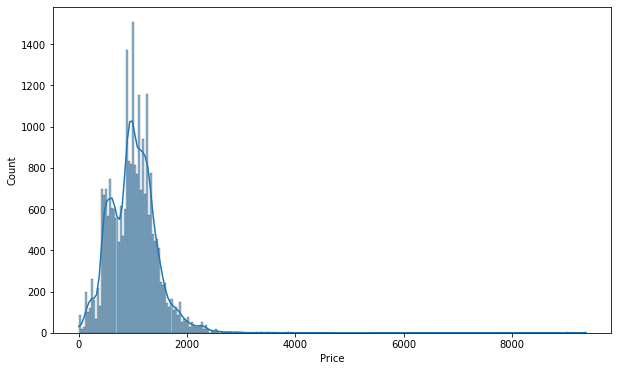

In [ ]:
# check the distribution of the price
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'price', kde = True)
plt.xlabel('Price')
plt.ylabel('Count')

In [ ]:
# check the extreme values in the price column
values = df[(df['price'] == 0) | (df['price'] > 4000)]['price'].unique()

In [ ]:
# replace the extreme values for price with median
df['price'] = df['price'].replace(values, df['price'].median())
df['price'].describe()

count    24843.000000
mean      1003.942182
std        417.432586
min          0.010000
25%        699.000000
50%        999.000000
75%       1248.680000
max       3893.750000
Name: price, dtype: float64

Text(0, 0.5, 'Count')

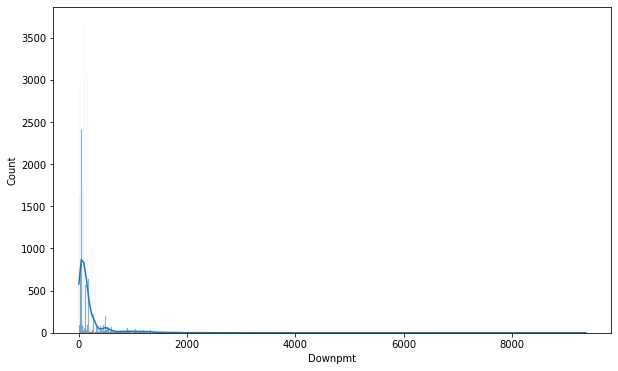

In [ ]:
# check the distribution for downpmt
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'downpmt', kde = True)
plt.xlabel('Downpmt')
plt.ylabel('Count')

In [ ]:
# check the extreme values in the downpmt column
values = df[df['downpmt'] > 2000]['downpmt'].unique()

In [ ]:
# replace extreme values for downpmt with median
df['downpmt'] = df['downpmt'].replace(values, df['downpmt'].median())
df['downpmt'].describe()

count    24843.000000
mean       190.741205
std        281.902136
min          0.000000
25%         49.000000
50%        100.000000
75%        175.000000
max       1990.990000
Name: downpmt, dtype: float64

Text(0, 0.5, 'count')

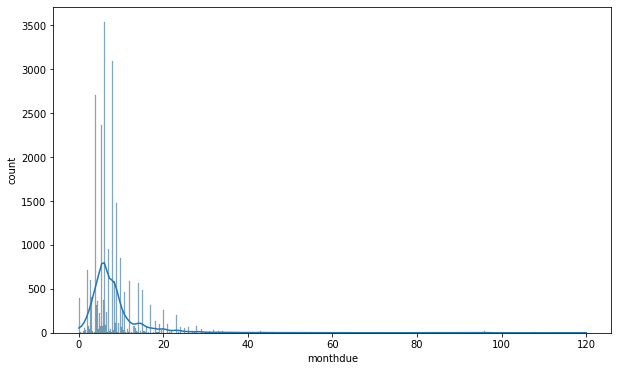

In [ ]:
# check the distribution for month_due
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'monthdue', kde = True)
plt.xlabel('monthdue')
plt.ylabel('count')

In [ ]:
# check the extreme values in the monthdue column
values = df[df['monthdue'] > 60]['monthdue'].unique()
values

array([ 96.  , 108.  , 120.  ,  62.1 , 111.  ,  74.66,  80.76,  81.51,
        64.  ,  71.75,  60.58,  66.56,  63.  ,  62.85,  69.  ,  69.57,
        91.46, 111.96])

In [ ]:
# replace the extreme values for monthdue with median
df['monthdue'] = df['monthdue'].replace(values, df['monthdue'].median())
df['monthdue'].describe()

count    24843.000000
mean         8.063231
std          5.635536
min          0.000000
25%          5.500000
50%          6.000000
75%          9.000000
max         59.350000
Name: monthdue, dtype: float64

Text(0, 0.5, 'Count')

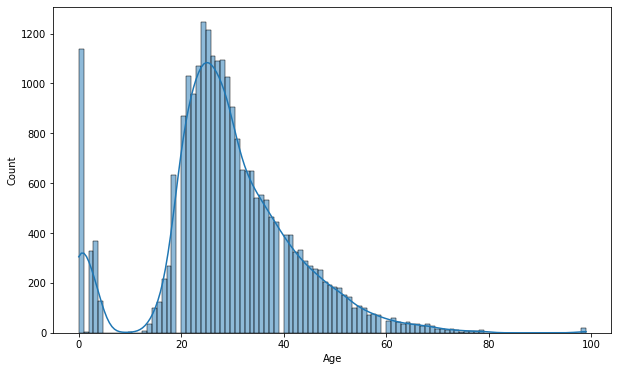

In [ ]:
# check the distribution for age
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'age', kde = True)
plt.xlabel('Age')
plt.ylabel('Count')

In our assumption, young children under 13 are not eligible for gym membership because they do not have stable income.

In addition, people over 80 years old are eliminated because they are less likely being a gym member.

In [ ]:
# check the extrem values in the age column
values = df[(df['age'] <= 13) | (df['age'] > 80)]['age'].unique()
values

array([ 0,  1,  2,  3,  4,  9, 10, 13, 99])

In [ ]:
# replace unrealistic age with median
df['age'] = df['age'].replace(values, df['age'].median())
df['age'].describe()

count    24843.000000
mean        31.279797
std         10.274656
min         14.000000
25%         24.000000
50%         28.000000
75%         36.000000
max         79.000000
Name: age, dtype: float64

In [ ]:
df.describe()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
count,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000
mean,1997.800547,1003.942182,190.741205,8.063231,3.093225,1.944371,31.279797,1.498007,0.115042
std,0.746802,417.432586,281.902136,5.635536,1.560034,2.315550,10.274656,0.500006,0.319080
min,1997.000000,0.010000,0.000000,0.000000,1.000000,0.000000,14.000000,1.000000,0.000000
25%,1997.000000,699.000000,49.000000,5.500000,1.000000,0.000000,24.000000,1.000000,0.000000
50%,1998.000000,999.000000,100.000000,6.000000,3.000000,1.000000,28.000000,1.000000,0.000000
75%,1998.000000,1248.680000,175.000000,9.000000,4.000000,3.000000,36.000000,2.000000,0.000000
max,1999.000000,3893.750000,1990.990000,59.350000,5.000000,8.000000,79.000000,2.000000,1.000000


# 5. Exploratory Data Analysis

Text(0.5, 1.0, 'count by default')

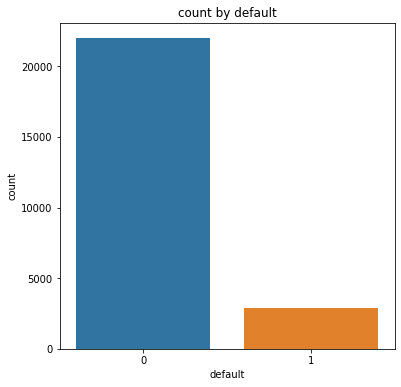

In [ ]:
# 1. Count how many people default
plt.figure(figsize = (6, 6))
sns.countplot(df['default'])
plt.xlabel('default')
plt.ylabel('count')
plt.title('count by default')

From the plot, the majority of the customers will not default.

In [ ]:
df['default'].value_counts()

0    21985
1     2858
Name: default, dtype: int64

Text(0.5, 1.0, 'default count by enrollment date')

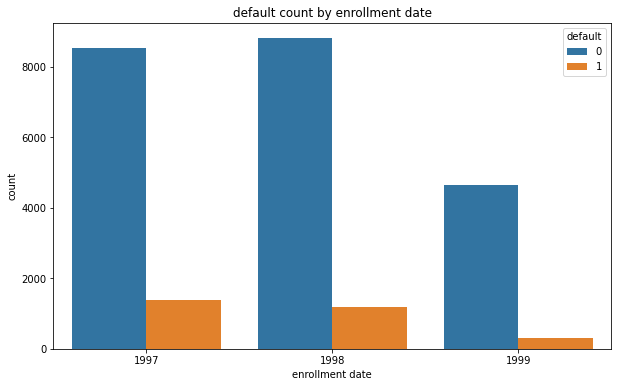

In [ ]:
# 2. check default by enrollment date
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'enrolldt', hue = 'default')
plt.xlabel('enrollment date')
plt.ylabel('count')
plt.title("default count by enrollment date")

In [ ]:
# default rate by year
df[['default', 'enrolldt']].groupby('enrolldt').mean()

,default
enrolldt,
1997,0.138499
1998,0.119100
1999,0.059871


From the table, we see that 1990 has a significantly lower default rate.

Text(0.5, 1.0, 'default count by price')

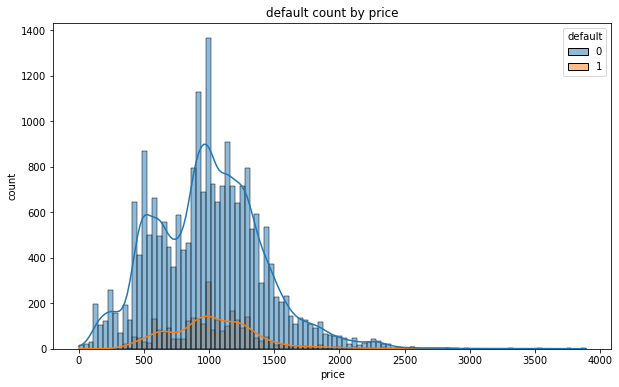

In [ ]:
# 3. check default by price
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'price', kde = True, hue = 'default')
plt.xlabel('price')
plt.ylabel('count')
plt.title('default count by price')

According to the plot, membership price around 1000 will have higher probability of defaulting.

Text(0.5, 1.0, 'default count by downpmt')

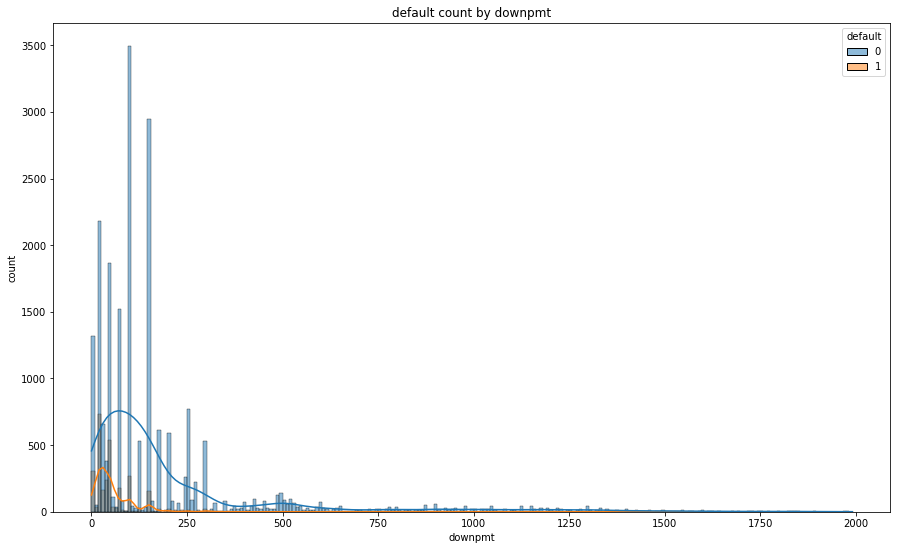

In [ ]:
# 4. check default by downpmt
plt.figure(figsize = (15, 9))
sns.histplot(data = df, x = 'downpmt', kde = True, hue = 'default')
plt.xlabel('downpmt')
plt.ylabel('count')
plt.title('default count by downpmt')

From the plot, we observe that people with down payment range 0-50 are more likely to default.

Text(0.5, 1.0, 'default count by monthdue')

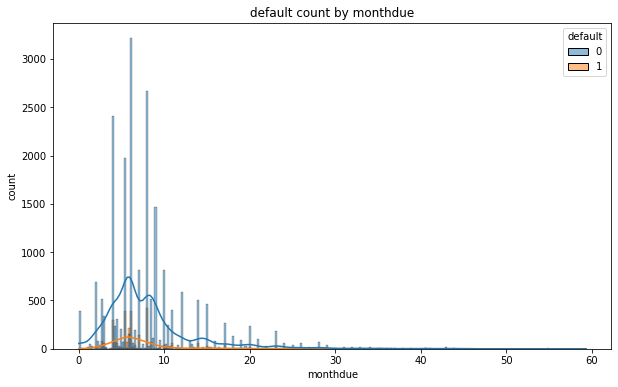

In [ ]:
# 5. check default by monthdue
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'monthdue', kde = True, hue = 'default')
plt.xlabel('monthdue')
plt.ylabel('count')
plt.title('default count by monthdue')

From the plot, no obvious trend could be observed from the monthly due.

Text(0.5, 1.0, 'default count by payment type')

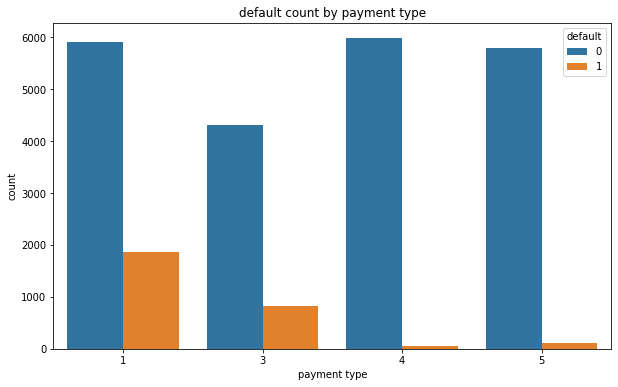

In [ ]:
# 6. check default by payment type
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'pmttype', hue = 'default')
plt.xlabel('payment type')
plt.ylabel('count')
plt.title('default count by payment type')


In [ ]:
# default rate by payment type
df[['pmttype', 'default']].groupby('pmttype').mean()

,default
pmttype,
1,0.239948
3,0.160902
4,0.009440
5,0.018817


From the table, we observe that **credit card** and **cash** have significantly higher default rate than other payment types.

In [ ]:
# 7. check default by use
df['use'].value_counts()

0    9919
1    5776
6    2462
3    2385
4    1483
5    1125
7     792
2     618
8     283
Name: use, dtype: int64

Text(0.5, 1.0, 'default count by use')

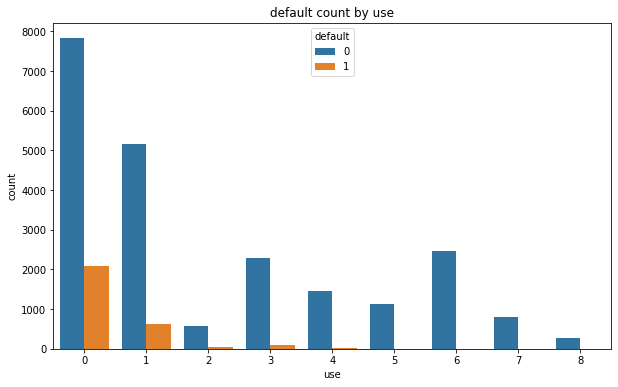

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'use', hue = 'default')
plt.xlabel('use')
plt.ylabel('count')
plt.title('default count by use')

In [ ]:
# default rate by use
df[['use', 'default']].groupby('use').mean()

,default
use,
0,0.210606
1,0.107514
2,0.061489
3,0.035220
4,0.010115
5,0.004444
6,0.002031
7,0.001263
8,0.000000


From the table, we see that the more frquently a customer goes to the gym, the less likely he/she will default. Therefore, 0 usage has the highest default rate.

Text(0.5, 1.0, 'default count by age')

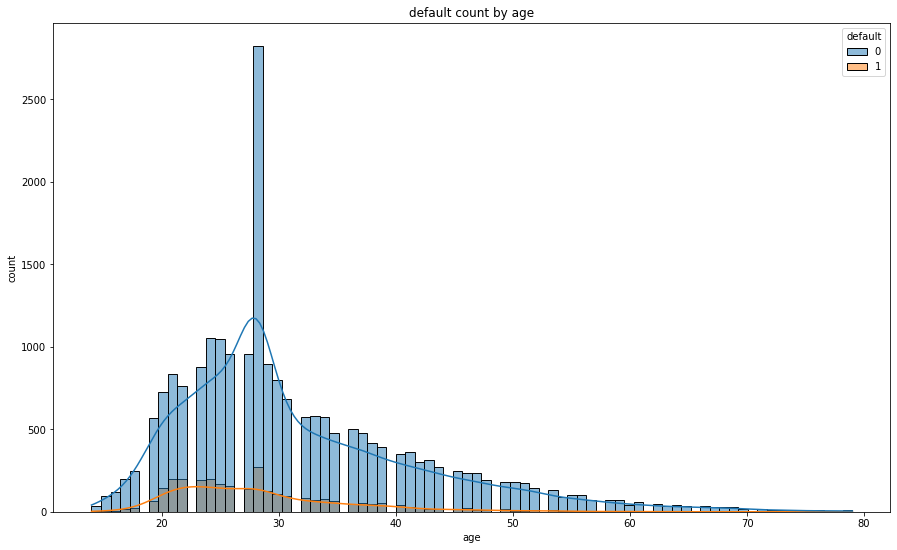

In [ ]:
# 8. check default by age
plt.figure(figsize = (15, 9))
sns.histplot(data = df, x = 'age', kde = True, hue = 'default')
plt.xlabel('age')
plt.ylabel('count')
plt.title('default count by age')

From the plot, we cannot observe an obvious trend from the age column.

Text(0.5, 1.0, 'default count by gender')

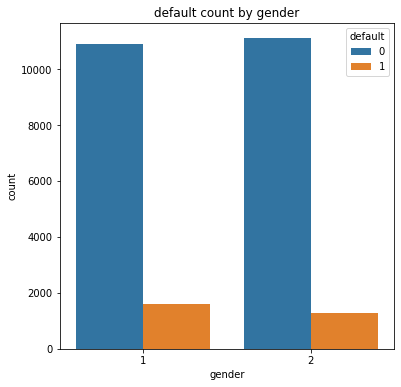

In [ ]:
# 9. check default by gender
plt.figure(figsize = (6, 6))
sns.countplot(data = df, x = 'gender', hue = 'default')
plt.xlabel('gender')
plt.ylabel('count')
plt.title('default count by gender')

In [ ]:
# default rate by gender
df[['gender', 'default']].groupby('gender').mean()

,default
gender,
1,0.127255
2,0.102732


From the table, we cannot see obvious difference in default rate by gender.

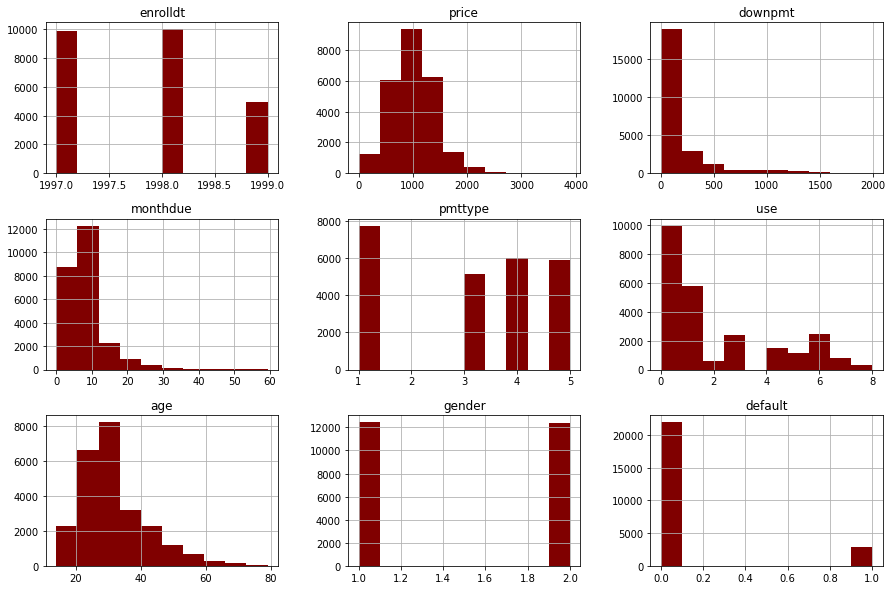

In [ ]:
# check the distributions for each variable
fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
df.hist(ax = ax, color = 'maroon')
pass

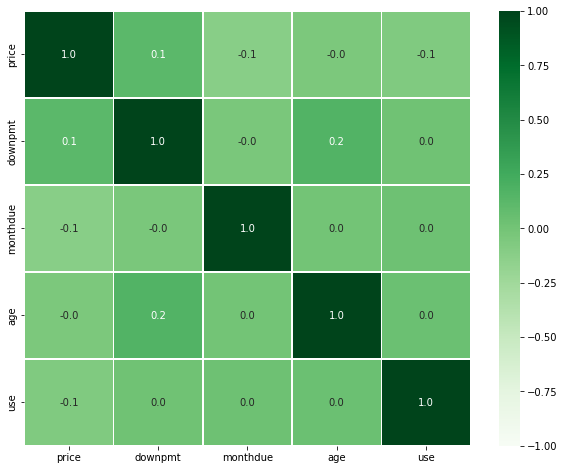

In [ ]:
# check the correlations bewteen the variables
var = ['price', 'downpmt', 'monthdue', 'age', 'use']

plt.figure(figsize = (10, 8))
corr = df[var].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidth=0.5, vmin=-1, vmax=1, fmt='.1f', cmap='Greens')

# 6. Modeling

Define predictors and target values.

In [ ]:
target = 'default'
predicators = ['enrolldt', 'price', 'downpmt', 'pmttype', 'use', 'age', 'gender']

In [ ]:
X = df.loc[:, predicators]
y = df[target]

Split train and test data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

**Balance training data by SMOTE(Synthetic Minority Oversampling Technique)**

Before oversampling, counts of 'default' and 'non-default' are:

In [ ]:
y_train.value_counts()

0    13222
1     1683
Name: default, dtype: int64

Implement SMOTE to create a balanced dataset.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

After oversampling, verify the lastest counts of 'default' and 'non-default'.

In [ ]:
y_train.value_counts()

1    13222
0    13222
Name: default, dtype: int64

Feature Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
# fit() used for computing mean and std for later scaling
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

**Try different models for the dataset**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = RANDOM_STATE)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
print('Confusion Matrix for Logistic Regression Model: \n', confusion_matrix(y_test, y_pred_lr))
#  [[TN FP]
#  [ FN  TP]]

Confusion Matrix for Logistic Regression Model: 
 [[7549 1214]
 [ 250  925]]


In [ ]:
print('Classification Report for Logistic Regression Model: \n', classification_report(y_test, y_pred_lr))

Classification Report for Logistic Regression Model: 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      8763
           1       0.43      0.79      0.56      1175

    accuracy                           0.85      9938
   macro avg       0.70      0.82      0.73      9938
weighted avg       0.90      0.85      0.87      9938



In [ ]:
from sklearn import metrics

In [ ]:
def auc_roc(y_pred_probs, y_test):
  auc = metrics.roc_auc_score(y_test, y_pred_probs)
  print('AUC Score: %.2f\n' % auc)

  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs)
  plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
  plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

In [ ]:
pred_prob = lr.predict_proba(X_test_scaled)
probs = pred_prob[:, 1]

AUC Score: 0.91



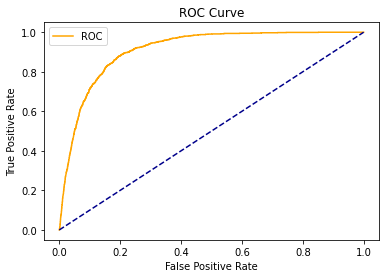

In [ ]:
auc_roc(probs, y_test)

2. Random Forest

Hyperparameter Tuning: use grid search to identify the optimal parameters of our random forest model.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(oob_score = True, random_state = RANDOM_STATE, n_jobs = -1)
param_grid = {'n_estimators': [200, 500],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [2, 4, 6, 8],
              'criterion': ['gini', 'entropy']}
CV_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
CV_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
print(CV_rf.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [ ]:
print(CV_rf.best_score_)

0.9082971868393942


In [ ]:
rf = RandomForestClassifier(random_state = RANDOM_STATE, max_features = 'auto', n_estimators = 500, max_depth = 8, criterion = 'gini')

In [ ]:
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [ ]:
print('Confusion Matrix for Random Forest Model: \n', confusion_matrix(y_test, y_pred_rf))

Confusion Matrix for Random Forest Model: 
 [[7608 1155]
 [ 213  962]]


In [ ]:
print('Classification Report for Random Forest Model: \n', classification_report(y_test, y_pred_rf))

Classification Report for Random Forest Model: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      8763
           1       0.45      0.82      0.58      1175

    accuracy                           0.86      9938
   macro avg       0.71      0.84      0.75      9938
weighted avg       0.91      0.86      0.88      9938



AUC Score: 0.92



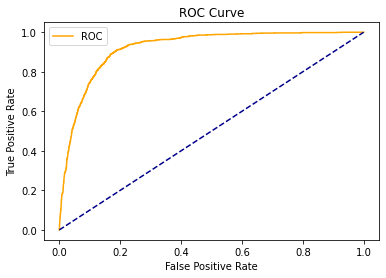

In [ ]:
pred_prob = rf.predict_proba(X_test_scaled)
probs = pred_prob[:, 1]
auc_roc(probs, y_test)

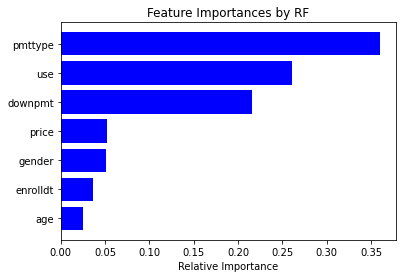

In [ ]:
# Find feature importance
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances by RF')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

3. Decision Tree

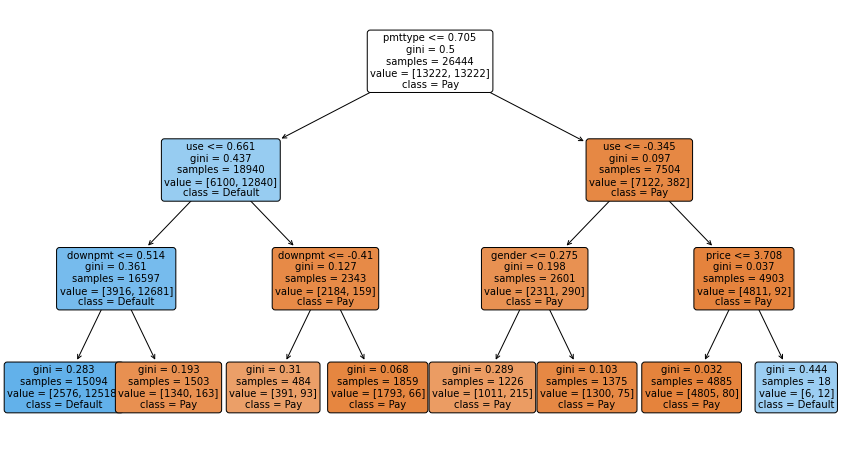

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
# Train Decision Tree Classifer
dt = dt.fit(X_train_scaled, y_train)
plt.figure(figsize=(15,8))
tree.plot_tree(dt, fontsize=10,feature_names = X.columns,
               class_names=['Pay','Default'],
               filled = True,rounded=True)
plt.show()

In [ ]:
y_pred_dt = dt.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_dt)

0.8046890722479372

AUC Score: 0.86



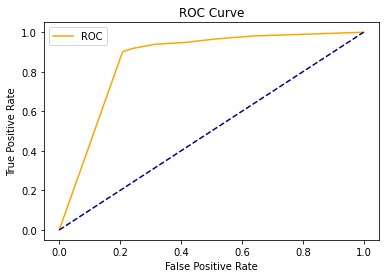

In [ ]:
pred_prob = dt.predict_proba(X_test_scaled)
probs = pred_prob[:, 1]
auc_roc(probs, y_test)

In [ ]:
print("\nConfusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_dt))


Confusion Matrix for Decision Tree:
 [[6938 1825]
 [ 116 1059]]


In [ ]:
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.98      0.79      0.88      8763
           1       0.37      0.90      0.52      1175

    accuracy                           0.80      9938
   macro avg       0.68      0.85      0.70      9938
weighted avg       0.91      0.80      0.84      9938



4. XGBoosts

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
print(type(xgb_cl))

<class 'xgboost.sklearn.XGBClassifier'>


In [ ]:
# Fit
xgb_cl.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_cl.predict(X_test_scaled)

# Score
accuracy_score(y_test, y_pred_xgb)

0.8727108070034212

Improve the model performance further by user *GridSearchCV*

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
CV_xgb = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
CV_xgb.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='roc_auc')

In [ ]:
CV_xgb.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [ ]:
CV_xgb.best_score_

0.9768726588282574

In [ ]:
xgb_final = xgb.XGBClassifier(
    **CV_xgb.best_params_,
    objective="binary:logistic"
)

In [ ]:
# Predict on the test-set
xgb_final.fit(X_train_scaled, y_train)
preds = xgb_final.predict(X_test_scaled)
accuracy_score(y_test, preds)

0.884282551821292

In [ ]:
# Insert the new fixed values to the grid
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]

# Give new value ranges to other params
param_grid["max_depth"] = [7,9,10,15]
param_grid["reg_lambda"] = [0,0.1,0.2,0.3]
param_grid["gamma"] = [0,0.05,0.1]
param_grid["learning_rate"] = [0.1,0.3,0.5]
param_grid["scale_pos_weight"] = [0.1,0.5,1]

In [ ]:
CV_xgb_2 = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")
CV_xgb_2.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.05, 0.1],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [7, 9, 10, 15],
                         'reg_lambda': [0, 0.1, 0.2, 0.3],
                         'scale_pos_weight': [0.1, 0.5, 1],
                         'subsample': [0.8]},
             scoring='roc_auc')

In [ ]:
CV_xgb_2.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.05,
 'learning_rate': 0.1,
 'max_depth': 15,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [ ]:
CV_xgb_2.best_score_

0.9837757952379024

In [ ]:
xgb_final = xgb.XGBClassifier(
    **CV_xgb_2.best_params_,
    objective="binary:logistic"
)

In [ ]:
# Predict on the test-set
xgb_final.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_final.predict(X_test_scaled)
accuracy_score(y_test, y_pred_xgb)

0.8984705172066815

In [ ]:
print("\nConfusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_xgb))


Confusion Matrix for Decision Tree:
 [[8160  603]
 [ 406  769]]


In [ ]:
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_xgb))


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      8763
           1       0.56      0.65      0.60      1175

    accuracy                           0.90      9938
   macro avg       0.76      0.79      0.77      9938
weighted avg       0.91      0.90      0.90      9938



AUC Score: 0.92



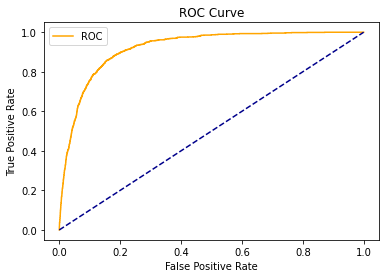

In [ ]:
pred_prob = xgb_final.predict_proba(X_test_scaled)
probs = pred_prob[:, 1]
auc_roc(probs, y_test)

5. Lightgbm

In [ ]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier()

In [ ]:
# Fit
lgb_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_lgb = lgb_clf.predict(X_test_scaled)

# Score
accuracy_score(y_pred_lgb, y_test)

0.8849869188971624

In [ ]:
print("\nConfusion Matrix for Lightgbm:\n", confusion_matrix(y_test, y_pred_lgb))


Confusion Matrix for Lightgbm:
 [[7916  847]
 [ 296  879]]


In [ ]:
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_lgb))


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      8763
           1       0.51      0.75      0.61      1175

    accuracy                           0.88      9938
   macro avg       0.74      0.83      0.77      9938
weighted avg       0.91      0.88      0.89      9938



AUC Score: 0.93



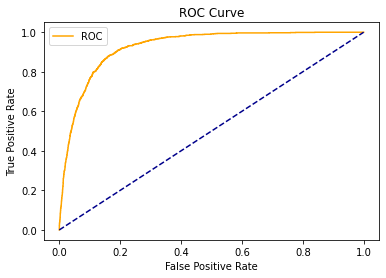

In [ ]:
pred_prob = lgb_clf.predict_proba(X_test_scaled)
probs = pred_prob[:, 1]
auc_roc(probs, y_test)

In [ ]:
# Computing Metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
acc_list, pre_list, re_list, f1_list = [], [], [], []

In [ ]:
def compute_metrics(Y_test, Y_pred):
  acc = round(accuracy_score(Y_test, Y_pred), 3)
  acc_list.append(acc)
  pre = round(precision_score(Y_test, Y_pred), 3)
  pre_list.append(pre)
  re = round(recall_score(Y_test, Y_pred), 3)
  re_list.append(re)
  f1 = round(f1_score(Y_test, Y_pred), 3)
  f1_list.append(f1)


In [ ]:
# logistic regression
compute_metrics(y_test, y_pred_lr)

# random forest
compute_metrics(y_test, y_pred_rf)

# decision tree
compute_metrics(y_test, y_pred_dt)

# xgboosts
compute_metrics(y_test, y_pred_xgb)

# lightgbm
compute_metrics(y_test, y_pred_lgb)

In [ ]:
# Build results table & compare
model_list = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoosts', 'LightGBM']
res = pd.DataFrame({
    'Model': model_list,
    'Accuracy': acc_list,
    'Precision': pre_list,
    'Recall': re_list,
    'F1-Score': f1_list,
})

res

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.853,0.432,0.787,0.558
1,Random Forest,0.862,0.454,0.819,0.584
2,Decision Tree,0.805,0.367,0.901,0.522
3,XGBoosts,0.898,0.560,0.654,0.604
4,LightGBM,0.885,0.509,0.748,0.606



# 7. Conclusions

### Model Selection

Before we move on to detailed analysis, let us first define several concepts:
* *True Positive*: the model predicts the customer will default, and he/she did default (didn't pay dues).
* *False Positive*: the model predicts the customer will default, but he/she didn't default (pay dues in time).
* *True Negative*: the model predicts the customer will not default, and he/she didn't default (pay dues in time).
* *False Negative*: the model predicts the customer will not default, however, he/she did default (didn't pay dues).
* ***Precision***: among all the predicted defaults, how many customers are really defaults (didn't pay dues).
* ***Recall***: among all the customers that are actually defaulted, how many did the model successfully predicted.


Based on the metrics comparison table, we notice that **XGBoosts** and **LightGBM** have a relatively better performance, in terms of Accuracy and F1-Score. They also have high AUC Score. The only difference is that **XGBoosts** has a higher Precision score, but a lower Recall score, as compared to **LightGBM**.

On the business side, since Planet Fitness is targeting at growing customer base, by giving out long-term membership offers, it would be more likely to see **less *False Positive***. The **risk** of *False Positive* is that, Planet Fitness will falsely/accidentally turn down some valuable customers, **losing a large potential market**. (Some loyal customers may also bring in their friends who might then become new memebers).

On the other hand, we can **tolerate up to a certain level of *False Negative*(customer will default but we fail to identify)**, as long as it is controllable (e.g., within 5%). This is because we do not want to discourage customers from coming to gyms and becoming memberships. Instead, we want all the customers become sticky to the memberships.

As such, **XGBoosts** would be the final model selection, since we want to minimize *False Positive*, and therefore achieving a higher *Precision* score. 

### Further Analysis

In order to have a more accurate prediction, **additional member data** (e.g., job, income, location, habits) is required to establish customer groups.

Based on the clustering and prediction of default probability, **proposed different marketing strategies (action bundles)** could be set up, in order to understand the potential reason of defaulting, and hopefully to avoid having customers defaulting on the gym membership payments.

# 8. References

[1] RandomForrestClassifier, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[2] Default of Credit Card Clients - Predictive Models, https://www.kaggle.com/gpreda/default-of-credit-card-clients-predictive-models#References

[3] Planet Fitness: Strong Franchise Growth And Household Incomes Are Pushing The Stock Higher Into 2020, https://seekingalpha.com/article/4320121-planet-fitness-strong-franchise-growth-and-household-incomes-are-pushing-stock-higher-2020

[4] LightGBM Python Implementation, https://github.com/Microsoft/LightGBM/tree/master/python-package

[5] Understanding Decisions Trees, https://towardsdatascience.com/understanding-decision-trees-once-and-for-all-2d891b1be579